Library Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Mount

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/DATASET/3 Class.csv')
dataset.head(5)

,Max,Min,STD,Kurtosis,Skewness,Class
0,2.984815,1.168864,0.147750,15.835978,-1.991657,0
1,2.884451,1.185363,0.163563,9.794411,-1.406157,0
2,2.933216,1.137018,0.173689,23.445637,-3.060911,0
3,2.940840,2.119462,0.135659,3.656691,-0.836316,0
4,2.931511,1.161739,0.130314,26.033551,-2.721046,0


In [4]:
print("Data shape:",dataset.shape)

Data shape: (537, 6)


In [5]:
dataset.isnull().sum()
print(dataset.isnull().sum())

Max         0
Min         0
STD         0
Kurtosis    0
Skewness    0
Class       0
dtype: int64


In [6]:
X = dataset.iloc[:, 0:5].values
x = dataset.iloc[:, 0:5]
y = dataset.iloc[:, 5].values
y_name = dataset.iloc[:, 5:6]
print("X shape:",X.shape)
print("y shape:",y_name.shape)

X shape: (537, 5)
y shape: (537, 1)


In [7]:
# iterating the columns 
print("Attributes:\n")
for col in x.columns: 
    print(col)

print("\n")
print("Class:")
for col in y_name.columns: 
    print(col)

Attributes:

Max
Min  
STD
Kurtosis
Skewness


Class:
Class


Co-relation Matrix (To know identify the relationship of target with attributes

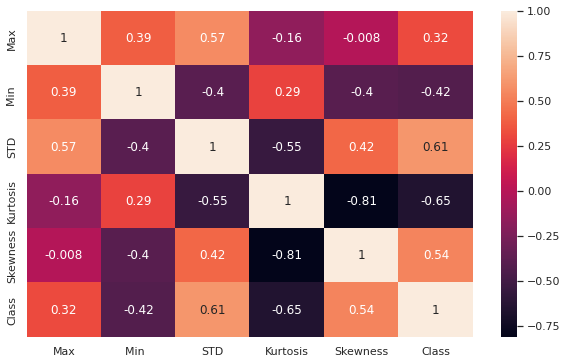

In [8]:
import seaborn as sn
import matplotlib.pyplot as plt
sn.set(font_scale=1)
sn.set_style("darkgrid")
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(dataset.corr(),annot=True, ax=ax)
plt.show()

Smote Analysis

In [9]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20)
X, y = sm.fit_resample(X, y)

In [10]:
print("X shape:",X.shape)
print("y shape:",y.shape)

X shape: (840, 5)
y shape: (840,)


Splitting (Train/Test) (70% Train, 30% Test)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

Feature Scaling (Difference between Each Attributes)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

KNN

In [13]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)

In [14]:
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
# Predicting the Test set results
y_pred_knn = classifier_knn.predict(X_test)

In [16]:
print(y_pred_knn)


[1 1 0 1 0 0 1 1 0 0 2 0 2 2 2 2 0 1 0 2 2 1 0 1 0 2 2 0 2 2 2 2 0 0 0 0 1
 2 2 0 2 0 2 0 1 1 2 2 0 1 2 0 2 2 1 2 2 1 1 2 1 2 0 2 2 2 1 0 1 1 2 1 2 0
 2 2 1 0 1 1 2 2 0 0 2 2 2 1 2 0 1 0 1 1 2 2 1 2 1 1 1 0 0 2 0 0 2 2 1 2 0
 0 1 1 1 0 2 1 0 0 2 0 1 2 1 0 2 0 1 1 1 1 0 2 0 1 1 1 2 2 2 2 1 2 0 1 1 0
 0 2 0 2 0 2 1 2 1 2 0 0 2 0 2 2 0 0 0 1 0 0 2 2 2 0 2 1 2 2 2 2 2 1 0 0 1
 1 0 0 1 2 1 0 0 2 0 1 0 2 1 2 0 0 0 0 0 2 2 0 2 2 2 0 2 1 0 2 0 1 0 0 1 1
 2 2 1 0 0 2 1 2 2 2 1 1 0 2 0 1 0 1 0 1 2 1 1 2 0 2 1 1 1 2]


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[81  0  0]
 [ 1 66 15]
 [ 0  9 80]]


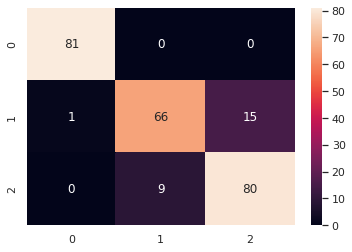

In [18]:
sn.heatmap(cm_knn, annot= True)

In [19]:
from sklearn.metrics import classification_report
print('Classification Report *Knn*')
print(classification_report(y_test, y_pred_knn))
print('\n')

Classification Report *Knn*
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.88      0.80      0.84        82
           2       0.84      0.90      0.87        89

    accuracy                           0.90       252
   macro avg       0.90      0.90      0.90       252
weighted avg       0.90      0.90      0.90       252





SVM

In [20]:
from sklearn.svm import SVC
classifier_svm = SVC( C=1.0,kernel = 'linear',probability=True, random_state = 0)

In [21]:
# Training the SVM
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [22]:
# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[81  0  0]
 [ 1 69 12]
 [ 0 25 64]]


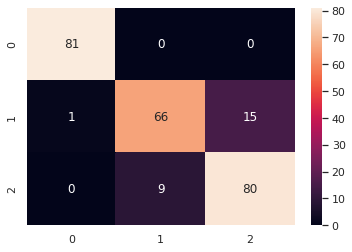

In [24]:
sn.heatmap(cm_knn, annot= True)

In [25]:
from sklearn.metrics import classification_report
print('Classification Report *svm*')
print(classification_report(y_test, y_pred_svm))
print('\n')

Classification Report *svm*
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.73      0.84      0.78        82
           2       0.84      0.72      0.78        89

    accuracy                           0.85       252
   macro avg       0.85      0.85      0.85       252
weighted avg       0.85      0.85      0.85       252





Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(min_samples_leaf= 5, max_depth= 3, max_features= 5, criterion= "gini")

In [27]:
# Training the Decision Tree
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=5, min_samples_leaf=5)

In [28]:
# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)

In [29]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[81  0  0]
 [ 1 36 45]
 [ 0  4 85]]


In [30]:
from sklearn.metrics import classification_report
print('Classification Report *dt*')
print(classification_report(y_test, y_pred_dt))
print('\n')

Classification Report *dt*
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.90      0.44      0.59        82
           2       0.65      0.96      0.78        89

    accuracy                           0.80       252
   macro avg       0.85      0.80      0.79       252
weighted avg       0.84      0.80      0.79       252





Linear Regression

In [31]:
from sklearn.linear_model import LogisticRegression
classifier_lr= LogisticRegression(dual=False,penalty="l2",random_state=0)

In [32]:
#Training the decision tree
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [33]:
#Predicting the test set results
y_pred_lr=classifier_lr.predict(X_test)

In [34]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[81  0  0]
 [ 1 70 11]
 [ 0 24 65]]


In [35]:
from sklearn.metrics import classification_report
print('Classification Report *lr*')
print(classification_report(y_test, y_pred_lr))
print('\n')

Classification Report *lr*
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.74      0.85      0.80        82
           2       0.86      0.73      0.79        89

    accuracy                           0.86       252
   macro avg       0.86      0.86      0.86       252
weighted avg       0.86      0.86      0.86       252





Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier_GaussianNB = GaussianNB(priors=None)

In [37]:
#Training the decision tree
classifier_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [38]:
#Predicting the test set results
y_pred_GaussianNB=classifier_GaussianNB.predict(X_test)

In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_GaussianNB = confusion_matrix(y_test, y_pred_GaussianNB)
print(cm_GaussianNB)

[[73  2  6]
 [ 2 57 23]
 [ 0 14 75]]


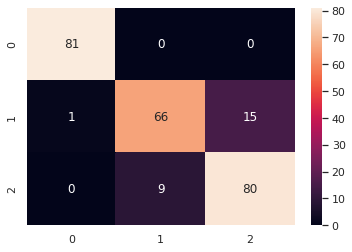

In [40]:
sn.heatmap(cm_knn, annot= True)

In [41]:
from sklearn.metrics import classification_report
print('Classification Report *GaussianNB*')
print(classification_report(y_test, y_pred_GaussianNB))
print('\n')

Classification Report *GaussianNB*
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        81
           1       0.78      0.70      0.74        82
           2       0.72      0.84      0.78        89

    accuracy                           0.81       252
   macro avg       0.83      0.81      0.82       252
weighted avg       0.82      0.81      0.81       252





Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 39,criterion="entropy",random_state=0)

In [63]:
#Training the decision tree
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=39, random_state=0)

In [64]:
#Predicting the test set results
y_pred_rf=classifier_rf.predict(X_test)

In [65]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[81  0  0]
 [ 1 74  7]
 [ 0  7 82]]


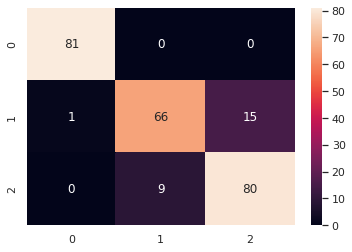

In [67]:
sn.heatmap(cm_knn, annot= True)

In [68]:
from sklearn.metrics import classification_report
print('Classification Report *rf*')
print(classification_report(y_test, y_pred_rf))
print('\n')

Classification Report *rf*
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       0.91      0.90      0.91        82
           2       0.92      0.92      0.92        89

    accuracy                           0.94       252
   macro avg       0.94      0.94      0.94       252
weighted avg       0.94      0.94      0.94       252



